In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.notebook_repr_html', True)
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

In [2]:
df_names = ['./DataSets/instagram_posts.csv', './DataSets/instagram_profiles.csv', './DataSets/instagram_locations.csv']

In [3]:
# Fill all the missing values 
def clean_df(df, col):
    df.dropna(subset = col, inplace = True)
    df.fillna('', inplace = True)
    return df

# RQ 1

After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

###  instagram_profiles.csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('instagram_profiles.csv', sep='\t')

In [5]:
df.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


We can see the different columns and get an idea of the structure of this dataframe. 

In [6]:
print(df.shape)

(4509586, 11)


This dataframe has 4509586 rows and 11 columns.

In [15]:
print(df.size)

49605446

This dataframe contains 49605446 elements.

In [7]:
print(df.columns)

Index(['sid', 'profile_id', 'profile_name', 'firstname_lastname',
       'description', 'following', 'followers', 'n_posts', 'url', 'cts',
       'is_business_account'],
      dtype='object')


These are the titles of the columns in the dataframe.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB
None


Here we have a summary of the data types contained in the dataframe. We see that the majority of columns contain object data types ('profile_name', 'firstname_lastname', 'description', 'url', 'cts', 'is_business_account'), other contain float64 data types('profile_id', 'following', 'followers', 'n_posts'). Only one column ('sid') containts int64 data type. 
For the columns that contain float64 and int64 data types we can use the describe method which computes the number of non-missing values ('count'), the mean, standard deviation, etc.

In [9]:
print(df.describe())

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


The first row of the above table gives us the number of non-missing values in the corresponding columns. The other rows of the above table are only relevant, in this case, for the 'following', 'followers' and 'n_posts' columns. 

In [12]:
print(df.isnull().sum())

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

The above table shows the number of missing values in the dataframe, for each column. The column with more missing values is the 'url' column with more than 3.6 million missing values, followed by the 'description' column with more than 2 million missing values.

In [16]:
print(df.isnull().sum().sum())

10689416


The number above represents the total number of missing values in the dataframe.

In [37]:
print(round(df.isnull().sum().sum()/df.size , 3))

0.215


Finally the above number represents the ratio of missing values with respect to the total number of values in the dataframe. In this case we have around 22% of missing values.

###  instagram_locations.csv file

In [38]:
df = pd.read_csv('instagram_locations.csv', sep='\t')

In [39]:
df.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [40]:
print(df.shape)

(1022658, 23)


This dataframe has 1022658 rows and 23 columns.

In [41]:
print(df.size)

23521134


This dataframe contains 23521134 elements.

In [42]:
print(df.columns)

Index(['sid', 'id', 'name', 'street', 'zip', 'city', 'region', 'cd', 'phone',
       'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'dir_city_id',
       'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'slug', 'website', 'cts'],
      dtype='object')


These are the names of the columns in the dataframe.

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

The above table summarizes the datatype contained in each column of the dataframe and the number or non-missing values in aech column. The column with the lowest number of Non-Null Count is the 'region' column, with only 1760 elements. 

In [45]:
print(df.isnull().sum())

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64


The above table shows the number of missing values in the dataframe. As seen before, the 'region' column is the one containing the least amount of non-missing data. The 'sid', 'id', 'name' and 'cts' columns, on the other hand, contain zero missing values.

In [46]:
print(df.isnull().sum().sum())

6610476


This is the total number of missing values in the dataframe.

In [47]:
print(round(df.isnull().sum().sum()/df.size , 3))

0.281


And finally this is the ratio of missing values over the total number of elements of the dataframe. For the 'instagram_locations.csv' dataframe we have a percentage of missing values of aroung 28%, higher than the one of 'instagram_profiles.csv'. 

###  'instagram_posts.csv' file

Since the dataframe is very large, we can get a first idea of what it contains by loading the first 500000 rows, for example, and printing the head of the dataframe as well as the column names:


In [20]:
df = pd.read_csv('instagram_posts.csv', sep = '\t', nrows = 500000)
df.head()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [21]:
print(df.columns)

Index(['sid', 'sid_profile', 'post_id', 'profile_id', 'location_id', 'cts',
       'post_type', 'description', 'numbr_likes', 'number_comments'],
      dtype='object')


In [22]:
print(df.shape)

(500000, 10)


This dataframe has 10 columns, and we are now considering the first 500000 rows. 
If we work with chunks we can compute the total number of elements in the dataframe, as well as the ratio of null values.

In [14]:
null_values = 0
tot_values = 0
for chunk in pd.read_csv('instagram_posts.csv', sep='\t', chunksize = 10 ** 6):
    null_values += chunk.isnull().sum().sum()
    tot_values += chunk.size
    
print("The total number of values is: ", tot_values, '\nThe number of null values is: ', null_values, 
     '\n The ratio of null values over total number of values is :', round(null_values/tot_values, 3))

The total number of values is:  427101970 
The number of null values is:  19554876 
 The ratio of null values over total number of values is : 0.046


The ratio of null values in this dataset is the lowest of the three datasets, being only 4.6%. 

# RQ2

### Plot the number of posts for each profile in descending order.

In [9]:
df = pd.read_csv('instagram_profiles.csv', sep='\t', usecols = ['profile_id', 'profile_name', 'n_posts'])

In [10]:
df.sort_values('n_posts', ascending = False).head(10) #sort by number of posts in descending order and show the head 
                                                      #of the dataframe

,profile_id,profile_name,n_posts
3990313,1.996648e+08,jasem33312,183730.0
2571453,8.563367e+09,koenigpic,142428.0
4338921,1.273455e+09,rudyanto62,126340.0
3942129,9.813508e+06,hometown_ni,125220.0
4219642,1.607309e+09,dwfitfiber_thailand,117262.0
2207897,1.087614e+09,waxking911,117099.0
4313908,1.603890e+09,gamt_official,113780.0
4219476,2.181730e+08,collarosedw_official,113182.0
4236057,2.855497e+08,gamt_authentic,112777.0
1631526,8.312603e+09,ivankkkka.trmp,112723.0


### What posts have the highest number of likes? 

In [11]:
df = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id', 'post_id', 'numbr_likes'])

In [12]:
df.sort_values('numbr_likes', ascending = False).head(10)  #sort by number of likes and show the head of the dataframe

,post_id,profile_id,numbr_likes
19624085,Bt3yaXmAM0d,4.906778e+07,8822952.0
19623988,BuwffB7g8cK,4.906778e+07,5447066.0
19624082,Buc1gyZAaMQ,4.906778e+07,5116398.0
19623986,BvcukE8AMuG,4.906778e+07,4271466.0
39701024,BqSLFVBFLfq,4.275539e+08,4264745.0
6293907,BwTSXBKg7gN,1.518284e+09,3586546.0
19624086,Btw8pFXAvQm,4.906778e+07,3558599.0
19802016,BvC3n6_gqin,2.153681e+09,3533326.0
30850564,Bw7vqLrFkHi,2.031501e+07,3340297.0
39812576,Bw2gTH1AiDA,3.530696e+07,3311246.0


### What posts have the most and the least number of comments?

In [13]:
df = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id', 'post_id', 'number_comments'])

df.sort_values('number_comments', ascending = False).head(10)      #sort by number of comments in descending order and show the
                                                                   #head of the dataframe

,post_id,profile_id,number_comments
41873060,Bx2sPAjHviO,1.635670e+09,488953.0
12164781,BuGjhWAhAW5,4.282994e+08,313997.0
33261751,BJ-rkpTgn1N,5.533645e+07,257488.0
11149127,BMtisIxjhtT,5.697152e+06,214365.0
9383817,BzOOWj3DfZK,1.062916e+09,189888.0
5427268,BoQoM-JFkPA,1.440949e+08,180635.0
25257169,Bwarws1lCok,1.666815e+07,173988.0
6220011,Bt4qlVDAZMH,1.797807e+08,170836.0
31689573,Bs9NhQkAcJA,6.760538e+06,166919.0
14257307,Bzqb95QI_1E,1.959418e+08,166198.0


In [15]:
df.dropna().sort_values('number_comments', ascending = False).tail(10)   #and then show the tail, dropping the NaN values

,post_id,profile_id,number_comments
13653251,BweQx5xh6R_,6.735518e+09,0.0
32092480,BsESs02BToJ,1.413730e+09,0.0
13653249,ByU2tWQBQzu,6.735518e+09,0.0
32092484,Bu53yP2HtO9,3.035704e+09,0.0
13653242,Bxo-h05pvYy,1.541710e+07,0.0
13653241,ByUB81Spb_0,1.541710e+07,0.0
13653240,ByWM8i3pH-9,1.541710e+07,0.0
32092488,BxCNk_NnNbC,5.908247e+08,0.0
13653236,Bv_Lkonl1dN,1.109772e+10,0.0
0,BXdjjUlgcgq,2.237948e+09,0.0


### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results

In [17]:
df = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id', 'post_id', 'location_id'])

In [18]:
df['location_id'].count()        #NUMBER OF NOT NAN IN 'LOCATION_ID' COLUMN

29737425

In [19]:
df['location_id'].isna().sum()   #NUMBER OF NAN IN 'LOCATION_ID' COLUMN 

12972772

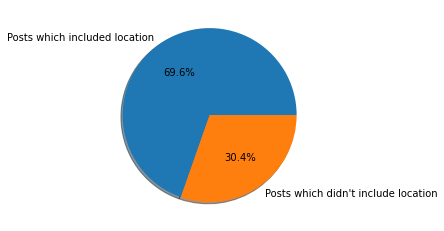

In [20]:
plt.pie([df['location_id'].count(), df['location_id'].isna().sum()], explode=None, 
        labels= ['Posts which included location', 'Posts which didn\'t include location'], colors=None, 
autopct='%1.1f%%', shadow=True)
plt.show()

69.6% of posts include a tag to the location, while 30.4% do not. This implies that a large majority of posts include a location tag. Only 3 out of 10 posts don't have a location tag. 

### How many posts include only photos? How many also have videos?

In [22]:
df = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id', 'post_id', 'post_type'])

In [23]:
df['post_type'].value_counts()   #1: only photos. 3:also videos    

1    41534486
2     1134768
3       40943
Name: post_type, dtype: int64

41534486 posts include only photos, while only 40943 include also videos.

### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [25]:
df = pd.read_csv('instagram_profiles.csv', sep='\t', usecols = ['profile_id', 'profile_name', 'is_business_account'])

In [26]:
df['is_business_account'].value_counts(normalize = True)

False    0.751764
True     0.248236
Name: is_business_account, dtype: float64

The majority of the accounts are non-business accounts. About 75% of Instagram accounts are personal accounts, while slightly less that 25% of them is made up of business accounts.

# RQ 3

In [3]:
clear(df)

In [4]:
df = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['cts'], parse_dates=['cts'])

## What is the most common time in which users publish their posts?

In [5]:
df.groupby(df['cts'].dt.time).size().sort_values(ascending = False).head(20)   #Grouping by time and sorting in descending order

cts
21:00:09    928
21:00:04    910
20:00:12    906
18:00:29    895
20:00:06    894
17:00:25    880
20:00:18    879
21:00:02    878
18:00:06    877
21:00:11    872
19:00:27    870
21:00:19    870
21:00:05    869
18:00:11    869
20:00:13    866
18:00:02    865
19:00:07    864
20:00:03    863
19:00:06    863
19:00:08    862
dtype: int64

The most common time in which users publish their posts is 21:00:09. 

In [45]:
df.groupby(df['cts'].dt.hour).size().sort_values(ascending = False).head(20)

cts
19.0    2499758
20.0    2495269
18.0    2486381
17.0    2423768
21.0    2414932
16.0    2341052
15.0    2263009
22.0    2167378
14.0    2158976
13.0    2025569
12.0    1868544
23.0    1838215
11.0    1720602
10.0    1571222
0.0     1547036
9.0     1434724
1.0     1376147
2.0     1290434
8.0     1267423
3.0     1231644
dtype: int64

The most common hour of the day in which users publish their posts is 19. 

## Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [255]:
def plot_number_of_posts(slots):       #slots is a list of time intervals 
    
    time_results = {}                  #time_results is an empty dictionary
    labels = []                        #labels is an empty list, for the plot

    
    #iterate through the time intervals and update the time_results dictionary with the number of posts published
    #in the time interval. Also update the labels list with the time intervals after converting them to strings.
    
    for slot in slots:
        labels.append((slot[0].strftime("%H:%M:%S"), slot[1].strftime("%H:%M:%S")))
        result= len( df[(df.cts.dt.time >= slot[0]) & (df.cts.dt.time <= slot[1])])
        time_results[slot] = result   
         
    plt.figure(figsize=(8,6))
    ax1 = plt.subplot()
    plt.yscale("log")                        #set log scale on y axis to better visualize high frequencies
    ax1.set_xticks(range(len(time_results)))
    plt.bar(range(len(time_results)), list(time_results.values()))
    ax1.set_xticklabels(labels)
    plt.xticks(rotation = 'vertical')
    plt.show()
    
    return 


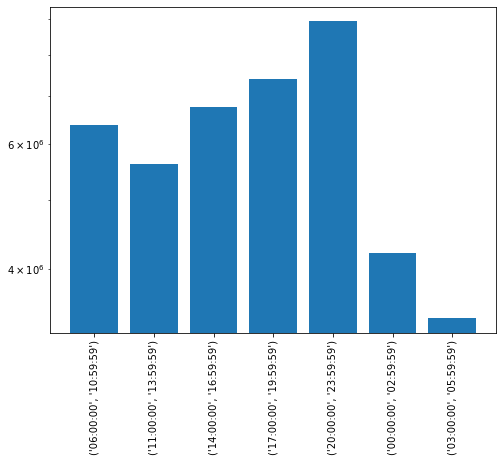

In [256]:
initial_time = ['06:00:00', '11:00:00', '14:00:00', '17:00:00', '20:00:00', '00:00:00', '03:00:00']
final_time = ['10:59:59', '13:59:59', '16:59:59', '19:59:59', '23:59:59', '02:59:59', '05:59:59']

#first convert the string lists to datetime objects 

i_time = []
f_time = []

for i in range(len(initial_time)):
    i_time.append(datetime.strptime(initial_time[i], '%H:%M:%S').time())
    f_time.append(datetime.strptime(final_time[i], '%H:%M:%S').time())

#then create the slots list
slots = zip(i_time, f_time)
#and finally call the function
plot_number_of_posts(slots)

# [RQ4] 
In most cases, we will not have a consistent dataset, and the one we are dealing
with is not an exception (ex. in the given datasets, you may not find the information of
the profiles for some of the posts). So let’s enhance our analysis.

### RQ4.1
Get a profile from the dataset of instagram profiles and search for the posts published by that profile_id

In [5]:
# Function that given a profile_id it gives back the posts of that profile
def PostsFromID(ID, df_names):
    post = []
    # Check the posts dataset dividing it in chunks of 500000 element
    for chunk in pd.read_csv(df_names[0], delimiter='\t', on_bad_lines='skip', chunksize=500000):
        chunk = clean_df(chunk, ['profile_id'])
        # If the profile_id is equal to the one in input I add the post row to my list
        post.append(chunk[chunk.profile_id == ID])
        
    # return the dataframe with all the post made by the wanted profile
    post = pd.concat(post)
    return post


# Function to print the results from the PostsFromID function
def ResultsPostFromId (Profile, posts):
    print('While looking for the posts of the profile:\n\n')
    # The profile we were working with
    display(Profile)
    if posts.empty:
        # Couldn't find any posts linked to the ID
        print('We found a inconsistency in our datasets. There was no match between the profile with the',
              Profile['profile_id'], 'ID and the dataset of posts.')
    else:
        print('We found', len(posts), 'different posts:\n\n')
        # Show the posts found
        display(posts)

In [7]:
#Testing previous function with a sample form the profile.csv
df = pd.read_csv(df_names[1], delimiter='\t', on_bad_lines='skip')
df = clean_df(df, 'profile_id')
Profile = df.sample()
Posts = PostsFromID(Profile.iloc[0].profile_id, df_names)
ResultsPostFromId(Profile, Posts)
del df

While looking for the posts of the profile:




,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2446216,2209710,1.009423e+10,aristeraphos,Emanuele Musella,Writer-bassistsinger-musicmaker-philosophy and...,85.0,94.0,11.0,www.facebook.com/aristeraphos,2019-04-06 01:18:02.598 -0400,False


We found 11 different posts:




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
28794842,17515504,2209710,ButeP9mnqFp,1.009423e+10,,2019-03-07 09:30:31.000,1,Martyr,12.0,2.0
28797386,17515511,2209710,BuriwJ_nWkP,1.009423e+10,,2019-03-06 15:31:23.000,1,Irrealt6,11.0,0.0
28797387,17515524,2209710,BurdiOYH_st,1.009423e+10,,2019-03-06 14:45:48.000,1,Colonne san Lorenzo,10.0,1.0
28797396,17515531,2209710,BuecD37nM5n,1.009423e+10,,2019-03-01 13:22:47.000,1,#spirits #twinpeaks #madness #shadows #blacklo...,30.0,1.0
28797652,17515543,2209710,BubLXFaHZLq,1.009423e+10,213658970.0,2019-02-28 06:59:08.000,1,#mysculpture #myart #goldenagegods #andogynous...,36.0,2.0
28797653,17515552,2209710,BubJ7ttHS6k,1.009423e+10,213658970.0,2019-02-28 06:46:40.000,1,Moondog / Odin sculpture - One of my artworks ...,19.0,4.0
28797654,17515565,2209710,BuY8R12HF-M,1.009423e+10,,2019-02-27 10:08:52.000,1,Middle Point ○●>}☆{<●○ #embracingtheyin #outsi...,17.0,0.0
28798197,17515574,2209710,Bto7EdDi8mf,1.009423e+10,,2019-02-08 18:34:46.000,1,Nocturn punk,16.0,0.0
28798198,17515586,2209710,BtY6kcSHDBy,1.009423e+10,,2019-02-02 13:22:32.000,1,The mountain temple #mountainvirgins #sagliuta...,11.0,0.0
28798200,17515598,2209710,BsYyDavnu2F,1.009423e+10,,2019-01-08 15:36:44.000,1,#insomnia,10.0,0.0


### RQ4.2 
Find the posts of the top n posted profiles

In [9]:
# Function that given a number in input gives back the n profile that has posted more (Top Posted Profiles)
def FindTopPP(df_names, n):
    
    # Read the profiles dataset and return the top n profiles sorted by number of posts
    df = pd.read_csv(df_names[1], delimiter='\t', on_bad_lines='skip')
    df = clean_df(df, ['profile_id','n_posts'])
    
    # return only the top n profiles after sorting
    return df.sort_values(by = 'n_posts', ascending=False).head(n)


# Modified version of the PostsFromID function that is now given n profiles 
# It gives back a list of lenght n with all their post
def PostsFromID_2 (profiles, df_names):
    # Initialize the list of lists were I can store the posts while working with the chunks
    post = []
    for i in range(len(profiles)):
        post.append([])
        
    # Taking the posts df in chucks
    for chunk in pd.read_csv(df_names[0], delimiter='\t', on_bad_lines='skip', chunksize=500000):
        
        #clean the dataframe
        chunk = clean_df(chunk, ['profile_id'])
        chunk['numbr_likes'] = pd.to_numeric(chunk['numbr_likes'], errors='coerce')
        chunk['number_comments'] = pd.to_numeric(chunk['number_comments'], errors='coerce')
        
        # If the profile_id is equal to one of the i-th profile in input 
        # I add it to the i-th element of the posts list
        for i in range(len(profiles)):
            post[i].append(chunk[chunk.profile_id == profiles.iloc[i]['profile_id']])
    
    # put together all the posts from the same ID
    for i in range(len(profiles)):
        post[i] = pd.concat(post[i])
        
    return post


# Function that given an integer n gives back a df of the n Top Posted Profiles and the list of their post
def TopPostedProfile (df_names):
    n = int(input())
    
    # Find the top n posted profiles
    topPP = FindTopPP(df_names, n)
    
    # Find all their post that are saved in the post.csv
    posts = PostsFromID_2(topPP, df_names)
        
    return topPP, posts


# Function that print the result for the posts of the Top Posted Profiles
def ResultsTPP (topPP, posts, n):
    print('These are the top', n, 'posted profiles in descending order and their posts.')
    
    # Print the profile and their posts for each of the Top Posted Profiles
    for i in range(n):
        print('The profile #'+ str(i+1) +' with', topPP.iloc[i]['n_posts'], 'posts is: \n\n')
        display(topPP.iloc[i])
        print("\n While searching for this profile's posts we found", len(posts[i]), 'different posts: \n\n')
        display(posts[i])

In [17]:
TPP, PostsTPP = TopPostedProfile(df_names)

 10


In [21]:
ResultsTPP(TPP, PostsTPP, 10)

These are the top 10 posted profiles in descending order and their posts.
The profile #1 with 183730.0 posts is: 




sid                                          3661552
profile_id                               199664772.0
profile_name                              jasem33312
firstname_lastname                        jasem33312
description                                         
following                                        2.0
followers                                    82049.0
n_posts                                     183730.0
url                                                 
cts                    2019-06-30 19:14:19.780 -0400
is_business_account                            False
Name: 3990313, dtype: object


 While searching for this profile's posts we found 21 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9592952,21205477,3661552,Bq3hP3Khp8J,199664772.0,1029593228.0,2018-12-02 03:03:33.000,1,,0.0,0.0
9592953,21205482,3661552,Bq3hN53hUsD,199664772.0,1029593228.0,2018-12-02 03:03:17.000,1,,0.0,0.0
9592954,24906254,3661552,BCqCe9LypeF,199664772.0,1029569178.0,2016-03-07 16:28:50.000,1,#تصويري,27.0,0.0
9592955,25468626,3661552,20Wu4zypd2,199664772.0,237398449.0,2015-05-18 11:21:27.000,1,#تصويري,28.0,0.0
9592956,27616128,3661552,BrKq76AhadU,199664772.0,321337322.0,2018-12-09 13:33:47.000,1,,1.0,0.0
9592957,28243841,3661552,Bq_MjFzB_Wt,199664772.0,280774016.0,2018-12-05 02:36:36.000,1,,7.0,0.0
9592958,28243843,3661552,Bq_MiKhhP05,199664772.0,280774016.0,2018-12-05 02:36:28.000,1,,3.0,0.0
9592959,36453059,3661552,BpQ2cmKF-W0,199664772.0,1023754497.0,2018-10-23 07:07:01.000,1,,1.0,0.0
9592960,8768851,3661552,3V4OeXypTT,199664772.0,279384086.0,2015-05-31 11:49:04.000,1,#تصويري,19.0,0.0
9592961,37701663,3661552,BzUmjr2pgni,199664772.0,,2019-06-30 07:19:05.000,1,,11.0,0.0


The profile #2 with 142428.0 posts is: 




sid                                          3288809
profile_id                              8563366588.0
profile_name                               koenigpic
firstname_lastname                 Helperwait Studio
description             Веб сайты от идеи до запуска
following                                     4538.0
followers                                      675.0
n_posts                                     142428.0
url                             vk.com/ru.helperwait
cts                    2019-05-07 00:14:06.799 -0400
is_business_account                             True
Name: 2571453, dtype: object


 While searching for this profile's posts we found 15 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
24956847,9253738,3288809,BxJpvMrpl0n,8.563367e+09,219610759.0,2019-05-07 02:12:26.000,1,,0.0,0.0
24978956,9253755,3288809,BxJpeX2pXeN,8.563367e+09,219610759.0,2019-05-07 08:10:08.000,1,,0.0,0.0
24979865,9253740,3288809,BxJptNSpk6g,8.563367e+09,219610759.0,2019-05-07 02:12:09.000,1,,0.0,0.0
24979875,9253736,3288809,BxJpzW4J6Aq,8.563367e+09,219610759.0,2019-05-07 02:13:00.000,1,,0.0,0.0
24979879,9253754,3288809,BxJpgQMJa66,8.563367e+09,219610759.0,2019-05-07 08:10:23.000,1,,0.0,0.0
24979938,9253733,3288809,BxJp2qgpVJo,8.563367e+09,219610759.0,2019-05-07 02:13:27.000,1,,0.0,0.0
24979946,9253737,3288809,BxJpxSLp4rB,8.563367e+09,219610759.0,2019-05-07 02:12:43.000,1,,0.0,0.0
24979961,9253756,3288809,BxJpcZ0JRqN,8.563367e+09,219610759.0,2019-05-07 08:09:52.000,1,,0.0,0.0
24979983,9253732,3288809,BxJp4i3pArJ,8.563367e+09,219610759.0,2019-05-07 02:13:42.000,1,,0.0,0.0
24980045,9253742,3288809,BxJpq3dppxY,8.563367e+09,219610759.0,2019-05-07 02:11:50.000,1,,0.0,0.0


The profile #3 with 126340.0 posts is: 




sid                                          3970193
profile_id                              1273455368.0
profile_name                              rudyanto62
firstname_lastname                      Rudyanto 王耀祝
description                                         
following                                      164.0
followers                                     1693.0
n_posts                                     126340.0
url                                                 
cts                    2019-07-15 10:00:51.171 -0400
is_business_account                            False
Name: 4338921, dtype: object


 While searching for this profile's posts we found 25 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11228406,11234220,3970193,BpfufadAl1f,1.273455e+09,378633680.0,2018-10-29 00:46:06.000,1,,3.0,0.0
12360807,39883137,3970193,Bz6mD1VpaJB,1.273455e+09,,2019-07-15 01:25:52.000,1,,2.0,0.0
12373338,17411337,3970193,BuCyAT8Abu3,1.273455e+09,1033097150187986.0,2019-02-19 01:35:48.000,1,,3.0,0.0
12373600,13449580,3970193,BxD_1nXgoBG,1.273455e+09,264866752.0,2019-05-05 03:30:06.000,1,,2.0,0.0
12373601,15459224,3970193,BvYZl1yAubo,1.273455e+09,525193438.0,2019-03-24 07:37:10.000,1,,4.0,0.0
12373602,21696681,3970193,BrkhuwcATjv,1.273455e+09,309589106299103.0,2018-12-19 14:33:36.000,1,,5.0,0.0
12373603,23623358,3970193,BwMTtZ5g4RY,1.273455e+09,360285247736067.0,2019-04-13 06:26:16.000,1,,2.0,0.0
12373604,25598876,3970193,Brt9v5VATSp,1.273455e+09,246458824.0,2018-12-23 06:31:35.000,1,,4.0,0.0
12373605,27289823,3970193,Bx7F9xKJCN2,1.273455e+09,170346010193550.0,2019-05-26 13:01:52.000,1,,2.0,0.0
12373606,28602137,3970193,BvNCnhMgdAl,1.273455e+09,337377583.0,2019-03-19 21:44:46.000,1,,8.0,0.0


The profile #4 with 125220.0 posts is: 




sid                                                              3621669
profile_id                                                     9813508.0
profile_name                                                 hometown_ni
firstname_lastname                                   AngelsCowboysLakers
description            All about live & let live. Peace & Harmony. La...
following                                                         7488.0
followers                                                         1755.0
n_posts                                                         125220.0
url                                                                     
cts                                        2019-06-27 02:49:38.140 -0400
is_business_account                                                False
Name: 3942129, dtype: object


 While searching for this profile's posts we found 27 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
2700732,31109333,3621669,BuUnJu0Al2B,9813508.0,344861278.0,2019-02-25 23:47:25.000,2,,1.0,0.0
2701237,31109320,3621669,BuUoORyAH_f,9813508.0,344861278.0,2019-02-25 23:56:40.000,1,,1.0,0.0
2701238,31109325,3621669,BuUnmnCgUzr,9813508.0,344861278.0,2019-02-25 23:51:27.000,2,,4.0,0.0
2701239,31109327,3621669,BuUnj84AFkT,9813508.0,344861278.0,2019-02-25 23:50:53.000,1,,1.0,0.0
2701240,31109328,3621669,BuUnSeIgm2f,9813508.0,344861278.0,2019-02-25 23:48:30.000,1,,0.0,0.0
4139609,32608362,3621669,BwkAH07AXac,9813508.0,189200691655438.0,2019-04-22 17:16:53.000,1,,0.0,0.0
9237235,31109335,3621669,BuUnDGzAiQ6,9813508.0,344861278.0,2019-02-25 23:46:24.000,1,,0.0,0.0
9237318,31109330,3621669,BuUnQi9Af4P,9813508.0,344861278.0,2019-02-25 23:48:14.000,1,,0.0,0.0
9237391,31109331,3621669,BuUnLi7gq4m,9813508.0,344861278.0,2019-02-25 23:47:49.000,2,,1.0,0.0
9237392,37420360,3621669,BzMjJ57AeiI,9813508.0,,2019-06-27 04:15:25.000,1,,0.0,0.0


The profile #5 with 117262.0 posts is: 




sid                                                              3851869
profile_id                                                  1607309412.0
profile_name                                         dwfitfiber_thailand
firstname_lastname                            เห็นผลตั้งแต่เซ็ตแรกท้าลอง
description            ✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...
following                                                         7490.0
followers                                                        44951.0
n_posts                                                         117262.0
url                                                       bit.ly/2GdIYJl
cts                                        2019-07-13 02:10:07.317 -0400
is_business_account                                                 True
Name: 4219642, dtype: object


 While searching for this profile's posts we found 74 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1.607309e+09,244873610.0,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1.0,0.0
241977,28616591,3851869,BxtZ7__Fosq,1.607309e+09,362172550977423.0,2019-05-21 05:27:02.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0.0,0.0
319192,28694641,3851869,ByB2YpbnoZs,1.607309e+09,208691.0,2019-05-29 04:00:25.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,4.0,0.0
637098,29019247,3851869,BwUPb5dFZCR,1.607309e+09,926847407443777.0,2019-04-16 14:22:51.000,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1.0,0.0
1300143,29693418,3851869,ByJwLb5nTZ-,1.607309e+09,250922269.0,2019-06-01 05:40:06.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
40996470,26608560,3851869,BxzVRSRlS8m,1.607309e+09,194132457889239.0,2019-05-23 06:41:41.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,2.0,0.0
41291573,26912424,3851869,BxrFoB0l3TF,1.607309e+09,479749817.0,2019-05-20 07:51:03.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,3.0,0.0
41291586,26912435,3851869,Bxd1ovPl6OP,1.607309e+09,479749817.0,2019-05-15 04:21:13.000,1,#ฮีโร่กู้ปัญหาสิว ฝ้า กระ 🔥🔥\nคอลลาโรส+เกรปซี้...,3.0,0.0
42044048,27679099,3851869,Bxrlfihl-Qh,1.607309e+09,219637444.0,2019-05-20 12:29:31.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1.0,0.0


The profile #6 with 117099.0 posts is: 




sid                             345591
profile_id                1087613619.0
profile_name                waxking911
firstname_lastname     Frank Hernandez
description                           
following                        134.0
followers                        138.0
n_posts                       117099.0
url                                   
cts                                   
is_business_account              False
Name: 2207897, dtype: object


 While searching for this profile's posts we found 38 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
592982,28973172,345591,BsImXwXgQHo,1.087614e+09,429994336.0,2019-01-02 14:46:48.000,1,,0.0,0.0
593003,28973171,345591,BsIqY_RA9EP,1.087614e+09,429994336.0,2019-01-02 15:21:55.000,1,,1.0,0.0
593013,28973178,345591,Br6p0uIAjMc,1.087614e+09,429994336.0,2018-12-28 04:47:36.000,1,Merry Christmas My Mother,0.0,0.0
6605708,35244911,345591,BrdsiV5g1LP,1.087614e+09,19281804.0,2018-12-16 22:53:20.000,1,Merry Christmas Fellas,0.0,0.0
6605733,35244896,345591,BxD5MbfBUZL,1.087614e+09,19281804.0,2019-05-05 02:32:13.000,2,Where are u?,2.0,3.0
6605734,35244897,345591,BxD4bGuBZzV,1.087614e+09,19281804.0,2019-05-05 02:25:19.000,1,Stop By,2.0,0.0
6605735,35244898,345591,Bwvf6PLBl3t,1.087614e+09,19281804.0,2019-04-27 04:26:47.000,2,Stop By,1.0,0.0
6605736,35244899,345591,Bwvf1ZgBCgt,1.087614e+09,19281804.0,2019-04-27 04:25:38.000,1,,2.0,0.0
6605737,35244900,345591,BwvfvUNh7sC,1.087614e+09,19281804.0,2019-04-27 04:25:05.000,2,Elvis in da House,5.0,0.0
6605738,35244901,345591,BwveO3dhBPA,1.087614e+09,19281804.0,2019-04-27 04:11:51.000,2,Come on down,1.0,0.0


The profile #7 with 113780.0 posts is: 




sid                                                              3944512
profile_id                                                  1603889832.0
profile_name                                               gamt_official
firstname_lastname                          Official IG Of GAMT Thailand
description            ❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...
following                                                         7470.0
followers                                                        36001.0
n_posts                                                         113780.0
url                                                       bit.ly/2GdIYJl
cts                                        2019-07-14 21:10:30.785 -0400
is_business_account                                                 True
Name: 4313908, dtype: object


 While searching for this profile's posts we found 67 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
494943,28873428,3944512,BxjqpeJhofB,1.603890e+09,297115043.0,2019-05-17 10:40:38.000,1,"#gamt 1,290 free ems #gamtthailand #gamtsungla...",4.0,0.0
637087,29019245,3944512,BwUPb5mhGKA,1.603890e+09,926847407443777.0,2019-04-16 14:22:51.000,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1.0,0.0
4701715,33216453,3944512,BwRAgTFBTCv,1.603890e+09,1018683106.0,2019-04-15 08:14:40.000,1,หน้าพัง❗️สิวอุดตัน❗️สิวสเตียรอย❗️รอยสิว❗️ผิวหม...,3.0,0.0
4701724,33216456,3944512,BwIx0JsBwV4,1.603890e+09,1018683106.0,2019-04-12 03:32:23.000,1,เคล็ดลับผิวสวย เรียนเนียน ออร่ากระจาย‼️\nด้วยส...,3.0,0.0
7295774,35977485,3944512,Bvk-3r5BSzz,1.603890e+09,235582752.0,2019-03-29 04:53:48.000,1,😊อยากถอดหุ่นเก่าออกมั้ย\n😊ไม่ใช่เรื่องยาก ทักม...,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
30301859,14893051,3944512,BwobrRLhPn9,1.603890e+09,1020186939.0,2019-04-24 10:34:37.000,1,"#gamt 1,290 free ems #เครื่องเขียนน่ารัก #บรา ...",7.0,0.0
31758941,16344061,3944512,BvwMZZXBawf,1.603890e+09,1012809343.0,2019-04-02 14:23:38.000,1,😊อยากถอดหุ่นเก่าออกมั้ย\n😊ไม่ใช่เรื่องยาก ทักม...,5.0,0.0
37713201,23336033,3944512,BvtdiYNhwwF,1.603890e+09,445477176.0,2019-04-01 12:55:42.000,1,😊อยากถอดหุ่นเก่าออกมั้ย\n😊ไม่ใช่เรื่องยาก ทักม...,2.0,0.0
42154726,27798703,3944512,BxtyMobBsXy,1.603890e+09,1014532695.0,2019-05-21 08:59:01.000,1,"#gamt 1,290 free ems #gamtthailand #รัดส้น #คิ...",36.0,0.0


The profile #8 with 113182.0 posts is: 




sid                                                              3851808
profile_id                                                   218172998.0
profile_name                                        collarosedw_official
firstname_lastname                                   grapeseed+collarose
description            🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...
following                                                         7496.0
followers                                                        18021.0
n_posts                                                         113182.0
url                                                       bit.ly/2asesw7
cts                                        2019-07-13 02:08:17.407 -0400
is_business_account                                                 True
Name: 4219476, dtype: object


 While searching for this profile's posts we found 25 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
6309050,34925542,3851808,ByFkkDxBlTF,218172998.0,675250522669159.0,2019-05-30 14:41:39.000,1,หุ่นไซส์ S ที่ใครๆก็ปรารถนาอยากจะมี❗️❗️\nส่วนเ...,1.0,0.0
11427137,11776237,3851808,Bw3xOZVFTfl,218172998.0,236272063.0,2019-04-30 09:31:32.000,1,"☝🏻✨ปลุกความมั่นใจทุกเช้ากับ "" DW FITFIBER ""\nไ...",0.0,0.0
11427138,19246119,3851808,Bxh5gusFeXm,218172998.0,94413523.0,2019-05-16 12:12:02.000,1,☘DWFIFTEEN☘\nตัวจริงเรื่องวิตามินอาหารเสริมลดน...,0.0,0.0
11427139,24939943,3851808,BxBYUITlBi2,218172998.0,335310930563053.0,2019-05-04 03:06:16.000,1,🍒Promotion ดีๆสำหรับคนรักผิว #คอลลาโรส\n.\n🍇🍒ห...,0.0,0.0
11427140,25580601,3851808,Bv747rnlnxK,218172998.0,1033923307.0,2019-04-07 03:24:27.000,1,🌶#ยุค2018 ต้องดูแลตัวเอง ✨\n‼️หุ่นสวย กระชับทุ...,1.0,0.0
11427141,26298812,3851808,Bv8kK2ulHcd,218172998.0,220540503.0,2019-04-07 03:42:15.000,1,☘DWFIFTEEN☘\nตัวจริงเรื่องวิตามินอาหารเสริมลดน...,2.0,0.0
11427142,27434919,3851808,Bx4diu1hBVT,218172998.0,1296801730330866.0,2019-05-25 12:30:11.000,1,ดื้อยาแค่ใหนก็เอาอยู่ค่ะอยากผอมต้องลอง\n❤️เซตค...,1.0,0.0
11427143,30128378,3851808,Bu-hNsIFN6b,218172998.0,217825981.0,2019-03-14 06:23:31.000,1,คู่หูสุดปัง เซ็ตละ 580 (ส่งฟรีEMS)🎊\n#dwfiftee...,0.0,0.0
11427144,31052772,3851808,BxVIAi7l6Rw,218172998.0,277126216264223.0,2019-05-11 19:08:35.000,1,บวม อวบ อ้-ว-น \nทานมาเยอะมาก ลงยาก ดื้อแล้ว...,0.0,0.0
11427145,32294814,3851808,ByLF-UNhHVo,218172998.0,220360072.0,2019-06-01 18:09:48.000,1,✦ หน้าแก่แก้ได้\n‼️นอนดึก ตื่นเช้า หน้าโทรม หน...,1.0,1.0


The profile #9 with 112777.0 posts is: 




sid                                                              3868432
profile_id                                                   285549744.0
profile_name                                              gamt_authentic
firstname_lastname                          Official IG Of GAMT Thailand
description            ❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...
following                                                         7480.0
followers                                                        27511.0
n_posts                                                         112777.0
url                                                       bit.ly/2T2RIqG
cts                                        2019-07-13 09:28:30.025 -0400
is_business_account                                                 True
Name: 4236057, dtype: object


 While searching for this profile's posts we found 64 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11565095,12683706,3868432,Bv9WuDjA_my,285549744.0,633832676958395.0,2019-04-07 17:03:58.000,1,#gamt 1290.- #รับตัวแทนจำหน่ายรายได้ดี #รับหิ...,5.0,0.0
11565096,14718062,3868432,BwyQXF_ASSO,285549744.0,351493443.0,2019-04-28 06:08:09.000,1,#gamt 1290.- #เช่าชุดราตรีรามอินทรา #ศูนย์การค...,0.0,0.0
11565097,16787955,3868432,BxMDBXTgUEj,285549744.0,215680072.0,2019-05-08 06:31:51.000,1,#gamt 1290.- #ไปตำ #ผ่อนไปใช้ไป #ไปให้สุด #ไปใ...,4.0,0.0
11565098,18107669,3868432,BxQ0vapg8o1,285549744.0,2091863157805662.0,2019-05-10 03:03:16.000,1,#gamt 1290.- #บ้านนี้มีรัก #อยากกลับบ้าน #บ้าน...,1.0,0.0
11565099,18754428,3868432,BxHK3IAAvgm,285549744.0,597152288.0,2019-05-06 09:04:09.000,1,#gamt 1290.- #กางเกงใส่เที่ยว #ใส่ไปทะเล #ใส่ไ...,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11565172,39183860,3868432,Bz2KZMWAzaS,285549744.0,261807660848564.0,2019-07-13 08:07:09.000,1,"พร้อมส่ง 2,490- ว่าง 2\nCoach F73011 ACCORDION...",0.0,0.0
11565173,39183862,3868432,Bz2KIsGguxY,285549744.0,5229182.0,2019-07-13 08:04:54.000,1,"2290-(ป้าย 4,200)\nWMNS NIKE FREE RN CMTR 2017...",0.0,0.0
11565174,39183865,3868432,Bz2JMmhA1Bv,285549744.0,783465844.0,2019-07-13 07:56:42.000,1,***SALE*** พร้อมส่ง ราคา 750.- พร้อมส่ง สร้อยข...,0.0,0.0
27484079,11825625,3868432,BxR5tuQAfxT,285549744.0,821943618003726.0,2019-05-10 13:05:58.000,1,#gamt 1290.-,0.0,0.0


The profile #10 with 112723.0 posts is: 




sid                                          1312725
profile_id                              8312603412.0
profile_name                          ivankkkka.trmp
firstname_lastname            IVANKA DARCEY K. TRUMP
description                           DORA. 👄 #Mango
following                                     7497.0
followers                                        2.0
n_posts                                     112723.0
url                         www.flightclub.com/yeezy
cts                    2019-04-01 02:41:26.980 -0400
is_business_account                            False
Name: 1631526, dtype: object


 While searching for this profile's posts we found 0 different posts: 




,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


#### Considerations RQ4.2:
By looking at the result from the search of the Top Posted Profiles's posts we notice a big inconsistency in out datasets. We were able to find only a handfull of posts that are liked to the profiles that are supposed to have te most posts published, in fact we found only 341 out of the 1.264.541 posts.

### RQ4.3
What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [11]:
# Function that compute the average of likes and comments only of the TPP
def Like_Comment_TPP (df_names, post):
    likes = 0
    comments = 0
    
    # Sum together all the likes and comments from the posts of the TPP
    for i in range(len(post)):
        likes += post[i].numbr_likes.sum()
        comments += post[i].number_comments.sum() 
    
    print('Average number of likes of the top 10 Posted Profiles: '+ str(likes/float(len(post))) + 
          '\nAverage number of comments: '+ str(comments/float(len(post))))   

In [23]:
# Using PostTPP computed in RQ4.2 that contain the posts of the Top Posted Profiles 
Like_Comment_TPP(df_names, PostsTPP)

Average number of likes of the top 10 Posted Profiles: 117.4
Average number of comments: 5.7


### RQ4.4 
Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [12]:
# Function the find in which intervals are the posts from the Top Posted Profiles published
def TimeTPP(Post):
    Time_intervals = [(6,11),(11,14),(14,17),(17,20),(20,24),(0,3),(3,6)]
    # Inizializing the Post_time array 
    Post_time = np.zeros(len(Time_intervals))

    for i in range(len(Post)):
        Post[i].cts = pd.to_datetime(Post[i].cts)
        for j in range(len(Time_intervals)):
            # Assign each post to a Time interval
            a = Post[i][(Post[i].cts.dt.hour>=Time_intervals[j][0])]
            b = Post[i][(Post[i].cts.dt.hour<Time_intervals[j][1])]
            
            # Intersection of a that contains the posts published afted Time_intervals[j][0]
            # and b that contains the posts published before Time_intervals[j][1]
            Post_time[j] += len(pd.merge(a,b, how='inner'))
    return Post_time



# The box plot of the result of the previous function
def plotTimeTPP(Post_time):
    barx =  ['[6,11)','[11,14)','[14,17)','[17,20)','[20,24)','[0,3)','[3,6)']
    
    plt.bar(barx, Post_time)
    plt.title("Number of posts for each time frame", fontsize=15, y=1.03)
    plt.show()
    

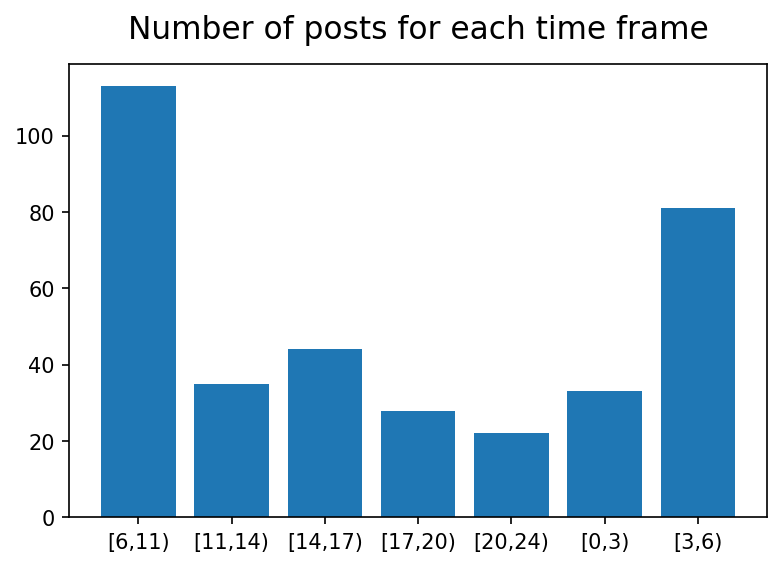

In [45]:
Times = TimeTPP(PostsTPP)
plotTimeTPP(Times)

#### Analysis RQ4.4:
From the bar plot we can see that most of the post are published in the time frame form $6$ to $11$.

But since we noticed in the RQ4.2 that there are some big inconsistency in out datasets (our sample is really small, there is less than 0.027% out of all the posts the Top Posted Profiles published), those result may not be accurate when looking at all the actual posts.

In [46]:
# Used to free the memory
del TPP, Times, PostsTPP

# Q5

## 1

##### Who are the 10 users with most followers? Write their names and number of posts.
We are only importing these columns since these are the ones we require.

In [2]:
data_profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t',usecols=['profile_id','profile_name','followers','n_posts'])

In [3]:
data_profiles.head(10)

,profile_id,profile_name,followers,n_posts
0,4.721050e+09,jphillip033,146.0,170.0
1,5.905830e+08,mama_haas,1145.0,2878.0
2,1.074147e+09,yellowlightbreen,324.0,431.0
3,1.472039e+09,tec1025,NaN,NaN
4,3.531421e+09,luckyfluff,NaN,NaN
5,1.450642e+08,sabahlke,192.0,590.0
6,2.061868e+09,masslivehs,4137.0,753.0
7,1.446651e+09,hvcanes,NaN,NaN
8,1.743726e+09,will_jay_k,183.0,37.0
9,5.455198e+09,ashley_downing722,NaN,NaN


We clean all the data, which in this case is changing all the NaN in followers for $0$.

In [4]:
data_profiles['followers'].fillna(0,inplace=True)
data_profiles['n_posts'].fillna(0,inplace=True)

In [5]:
s_data_profiles=data_profiles.sort_values(by='followers',ascending=False)

In [6]:
top10=s_data_profiles.head(10)
print(top10.loc[:,('profile_name','n_posts')])

            profile_name  n_posts
2880218        instagram   5760.0
2582507  victoriassecret   7355.0
3820939              nba  28816.0
701965      louisvuitton   3352.0
2414951    buzzfeedtasty   2791.0
2785241   andresiniesta8    990.0
333193                hm   4566.0
3934581  princessyahrini   4719.0
1311970     danbilzerian   1311.0
1703764      akshaykumar   1173.0


And these are the 10 users with more followers with their respective number of posts

In [7]:
del data_profiles,s_data_profiles

## 2

#### Who is the user with more followers?

In [8]:
top=top10.head(1)
print(top.loc[:,('profile_name','n_posts')])

        profile_name  n_posts
2880218    instagram   5760.0


The Instagram account of **Instagram** is the profile with more followers.

## 3

#### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

Here we require `instagram_posts.csv` and `instagram_locations.csv`, so we upload the columns that we need from the files.

In [9]:
data_loc=pd.read_csv('~/instagram_locations.zip', delimiter='\t',usecols=['id','name'])

In [10]:
ids=top10['profile_id'].values

In [11]:
data_posts=pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols=['profile_id','location_id','post_type','numbr_likes','number_comments'])

In [13]:
##Next we have to choose only the posts that have the same profile_id as one of the top10 influencers from before
top10_posts=[]
for i in range(10):
    top10_posts.append(data_posts[data_posts.profile_id==ids[i]])

In [14]:
for i in range(10):
    top10_posts[i].location_id.fillna(0,inplace=True) # Posts of the 10 more popular users 

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
# Here we create a list of lists where the list 'i' inside the main one corresponds to the locations visited by 
# by the i-th user among the 10 we are dealing with.

Loc=[]

for k in range(10):
    l=[]
    for i in range(len(top10_posts[k]['location_id'])):
        for j in range(len(data_loc['id'])):
            if top10_posts[k]['location_id'].iloc[i] == data_loc['id'][j]:
                l.append(data_loc['name'][j])
                
    Loc.append(l)


In [16]:
#Here we count how many times has each user visited each location with the function counter
from collections import Counter
C=[]
for i in range(10):
    C.append(Counter(Loc[i]))

In [17]:
num_posts,loc_tagged=0,0
for i in range(10):
    num_posts+=len(top10_posts[i])
    loc_tagged+=len(Loc[i])
print(f'The number of posts where they have tagged a location corresponds to the {100*loc_tagged/num_posts} %.')

The number of posts where they have tagged a location corresponds to the 74.46808510638297 %.


In [18]:
for i in range(10):
    k=0
    print(f'The influencer number {i+1}:')
    #If the city has been revisited, we print it.
    for key in C[i].keys():
        if C[i][key]>1:
            print(key,'has been visied',C[i][key],'times.')
            k+=1
    #If the user has not visited any city
    if k==0:
        print(f'The influencer number {i+1} has not revisited any place.')

The influencer number 1:
The influencer number 1 has not revisited any place.
The influencer number 2:
Victoria's Secret has been visied 4 times.
The influencer number 3:
Wells Fargo Center has been visied 2 times.
The influencer number 4:
The influencer number 4 has not revisited any place.
The influencer number 5:
The influencer number 5 has not revisited any place.
The influencer number 6:
Kobe-shi, Hyogo, Japan has been visied 3 times.
The influencer number 7:
The influencer number 7 has not revisited any place.
The influencer number 8:
Sydney, Australia has been visied 9 times.
Bora Bora, French Polynesia has been visied 2 times.
The influencer number 9:
Bel-Air Estate has been visied 2 times.
The influencer number 10:
The influencer number 10 has not revisited any place.


## 4

How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

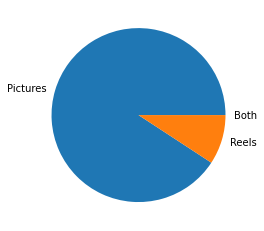

In [20]:
pics,vid,both=0,0,0
for i in range(10):
    for j in range(len(top10_posts[i])):
        aux=top10_posts[i]['post_type'].iloc[j]
        if aux==1:
            pics+=1
        elif aux==2:
            vid+=1
        elif aux==3:
            both+=1

import matplotlib.pyplot as plt
v=[pics,vid,both]

plt.pie(v,labels=['Pictures','Reels','Both'])
plt.show()

pic=100*pics/(pics+vid+both)
vids=100*vid/(pics+vid+both)
b=100*both/(pics+vid+both)


In [21]:
print(f'Observe that {pic}% of the posts onyl contain pictures, \n {vids}% contain reels and the remaining {b}% contains both types of media.')

Observe that 90.78014184397163% of the posts onyl contain pictures, 
 9.21985815602837% contain reels and the remaining 0.0% contains both types of media.


In [22]:
del data_loc

## 5

How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [54]:
posts_photo=[]
posts_vid=[]
likes,comments=[[0,0] for _ in range(10)],[[0,0] for _ in range(10)]
posts=[0 for _ in range(10)]
for i in range(10):
    #We split the posts between the ones with pictures only and the ones with reels or mixed
    posts_photo=top10_posts[i][top10_posts[i]['post_type']==1]
    posts_vid=top10_posts[i][top10_posts[i]['post_type']!=1]
    
    #For each, we add up all the likes and comments
    for k in range(len(posts_photo['numbr_likes'])):
        likes[i][0]+=posts_photo['numbr_likes'].iloc[k]
        comments[i][0]+=posts_photo['number_comments'].iloc[k]
        posts[i]+=1

    for k in range(len(posts_vid['numbr_likes'])):
        likes[i][1]+=posts_vid['numbr_likes'].iloc[k]
        comments[i][1]+=posts_vid['number_comments'].iloc[k]
        posts[i]+=1


In [56]:
#We were going to divide the likes of the post with photos with the number of posts with photos and
#likewise for the ones with videos but we met some 0 division, so we chose to divide by the total amount
#of posts for that profile.

for i in range(10):
    print('The user',top10['profile_name'].iloc[i],' has an average number of', likes[i][0]/posts[i],'likes in its posts with photos, \n an average number of', likes[i][1]/posts[i],' likes in its posts with videos \n with a total of',top10['followers'].iloc[i], 'followers. \n')

The user instagram  has an average number of 825998.1470588235 likes in its posts with photos, 
 an average number of 52359.67647058824  likes in its posts with videos 
 with a total of 285457645.0 followers. 

The user victoriassecret  has an average number of 164821.2857142857 likes in its posts with photos, 
 an average number of 74688.0  likes in its posts with videos 
 with a total of 65269440.0 followers. 

The user nba  has an average number of 174948.0 likes in its posts with photos, 
 an average number of 57582.11111111111  likes in its posts with videos 
 with a total of 35339708.0 followers. 

The user louisvuitton  has an average number of 186857.0 likes in its posts with photos, 
 an average number of 0.0  likes in its posts with videos 
 with a total of 30689316.0 followers. 

The user buzzfeedtasty  has an average number of 100862.92307692308 likes in its posts with photos, 
 an average number of 0.0  likes in its posts with videos 
 with a total of 30246783.0 followers.

We are now going to comment this last piece of data:

- **Instagram**: Has 16 times more likes in posts with photos rather than videos but still the number of likes is not even a $1$ % of the amount of followers.
- **Victoria's Secret**: Has twice more likes in posts with photos rather than videos but still the number of likes is not even a $1$ % of the amount of followers.
- **NBA**:  Has three times more likes in posts with photos rather than videos but still the number of likes is $0.5$ % of the amount of followers.
- **Louis Vuitton**: The number of likes in posts with pictures is slightly above the $0.5$ % of the amount of followers. On average, they recieve no likes in posts with only videos or both videos and pictures.
- **buzzfeedtasty**: The number of likes in posts with pictures is slightly above the $0.3$ % of the amount of followers. On average, they recieve no likes in posts with only videos or both videos and pictures.
- **Andrés Iniesta**: The number of likes in posts with pictures is around the $1.6$ % of the amount of followers. On average, he recieves no likes in posts with only videos or both videos and pictures.
- **H & M**: The number of likes in posts with pictures is slightly under the $0.3$ % of the amount of followers. On average, they recieve no likes in posts with only videos or both videos and pictures.
- **Pricess Yahrini**: The number of likes in posts with pictures is slightly above the $0.4$ % of the amount of followers. The number of likes in posts with videos is slightly above the $0.016$ % of the amount of followers. She recieves 26 times more likes in posts with pictures than in ones with videos.
- **Dan Bilzerian**: The number of likes in posts with pictures is slightly above the $3.3$ % of the amount of followers. On average, he recieves no likes in posts with only videos or both videos and pictures.
- **Aksha Ykumar**: The number of likes in posts with pictures is slightly under the $4$ % of the amount of followers. On average, they recieve no likes in posts with only videos or both videos and pictures.

# Q6

## 1

What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [ ]:
columns = ["profile_id", "profile_name"]
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t')
columns = ["profile_id", "cts", "numbr_likes", "number_comments"]

posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t', usecols = columns)
posts = posts.sort_values(by = ["profile_id", "cts"])
#drop where either id or timestamp is null
posts = posts.drop(posts[(posts.profile_id.isnull()) | (posts.cts.isnull())].index).reset_index()
#create a second table from posts without the first line, then concat the two
merge = posts.drop(index = posts.index[0]).reset_index()
posts["profile_id2"] = merge["profile_id"]
posts["cts2"] = merge["cts"]
posts["numbr_likes2"] = merge["numbr_likes"]
posts["number_comments2"] = merge["number_comments"]
#delete rows where profile_ids don't match
posts = posts.drop(posts[(posts.profile_id != posts.profile_id2)].index)
#calculate time differences, the groupby according to profile id
posts['diff'] = pd.to_datetime(posts['cts2']) - pd.to_datetime(posts['cts'])

mean = posts.groupby('profile_id')['diff'].mean()
mean = mean.sort_values()
mean = mean.drop(mean[(mean == '0 days 00:00:00')].index)
ids = mean.head(3).keys()
for i in mean.head(3).keys():
    p = profiles[profiles["profile_id"] == i]
    print(p["profile_name"])

## 2
Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [ ]:
posts["diff_like"] = posts["numbr_likes"] - posts["numbr_likes2"]
posts["diff_comment"] = posts["number_comments"] - posts["number_comments2"]

like = posts.groupby("diff")["diff_like"].mean().sort_values(ascending = False)
comment = posts.groupby("diff")["diff_comment"].mean().sort_values(ascending = False)

# Q7

## 1
What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [86]:
data_prof=pd.read_csv('~/instagram_profiles.csv', delimiter='\t',usecols=['profile_id','followers'])

In [87]:
data_prof.dropna(inplace=True)

In [88]:
posts=pd.DataFrame(columns=['profile_id','numbr_likes'])
for chunk in pd.read_csv('~/instagram_posts.csv',delimiter='\t',usecols=['profile_id','numbr_likes'],chunksize=500000):
    posts=pd.concat([posts,chunk.dropna()])


In [89]:
# We put all the data of posts and and profiles together
dataframe=pd.merge(posts,data_prof)

In [90]:
# We create a new column with the 20% of the amount of followers to later compare it with the likes
dataframe['perc']=0.2*dataframe['followers']

In [91]:
res=dataframe.loc[dataframe['numbr_likes']>dataframe['perc']]

In [92]:
result=len(res['profile_id'])
total=len(dataframe['profile_id'])
print('The probability that a post receives more than 20% "likes" of the number of followers that the user has is',round(100*result/total,2),'%')

The probability that a post receives more than 20% "likes" of the number of followers that the user has is 15.72 %


In [93]:
del dataframe,data_prof,posts

## 2

Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.


We will count the number of locations visited once and the number of locations revisited and compute the probability in an empirical way, just like we have done in the previous part.

In [73]:
posts=pd.DataFrame(columns=['profile_id','location_id'])
for chunk in pd.read_csv('~/instagram_posts.csv',delimiter='\t',usecols=['profile_id','location_id'],chunksize=500000):
    posts=pd.concat([posts,chunk.dropna()])

We sort all the posts by their location

In [75]:
posts.sort_values(by='location_id',ascending=False,inplace=True)

We count how many posts there are for each location

In [78]:
from collections import Counter
w=Counter(posts['location_id'])

Then we make a vector such that all the posts between the elements `i` and `i+1` belong to the same location

In [80]:
aux=[w[i] for i in w.keys()]
for i in range(1,len(w)):
    aux[i]+=aux[i-1]
posts_per_loc=[0]
for i in range(len(w)):
    posts_per_loc.append(aux[i])


Finally, for every location, we take all the profiles that have posted something in that location. Then we count how many times each has done it and we add up all the users that have been in some location more than once.

In [81]:
total=len(posts['location_id'])
k=0
for i in range(len(w)):
    v=posts['profile_id'][posts_per_loc[i]:posts_per_loc[i+1]].values
    D=Counter(v)
    for j in D.keys():
        if D[j]>1:
            k+=1
        
    

In [83]:
print(f'The probability that a user returns to a location is {round(100*(k/total),2)} %')

The probability that a user returns to a location is 10.35 %


We obtain that the probability of a user returning to a site is around the $10$ %. 
This means that once a user posts something in a locations, it is not very likely to post something there again. 
This makes sense since people, once they have visited a place, they are more likely to go somewhere else rather than repeating the same place, since it would be very similar to what they saw when they went the last time.

# [RQ8] 
Every decision you take in a data-based environment should be reinforced with
charts, statistical tests and analysis methods to check whether a hypothesis is correct or
not.


### RQ8.1 
Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs
comments for posts

In [4]:
#Function that find all the number of comments and likes for each post
def FindLC(df_names):
    posts = []
    
    # Read in chunks only the col from the post df that I need 
    for chunk in pd.read_csv(df_names[0], delimiter='\t', usecols = ['numbr_likes', 'number_comments'], 
                             on_bad_lines='skip', chunksize=500000):
        
        # clean the df
        chunk = clean_df(chunk, ['numbr_likes', 'number_comments'])
        posts.append(chunk[['numbr_likes', 'number_comments']])
    
    # Put everything together
    posts = pd.concat(posts)
    
    # Since I have to plot the points, I just need one for each 'couple' of (n_comments, n_likes) and 
    # I can drop the duplicates
    posts = posts.drop_duplicates()
    return posts 


#plot the scatter plot of the likes and comment of every posts in the posts dataset
def plotLC(post):
    sns.regplot(x=post.numbr_likes, y=post.number_comments, color='green')
    #plt.scatter(post.numbr_likes, post.number_comments, s=7, c='green', alpha = 0.5)
    plt.xlabel('number of likes')
    plt.ylabel('number of comments')
    plt.title("Number of likes and comments from the posts dataset", fontsize=15, y=1.03)

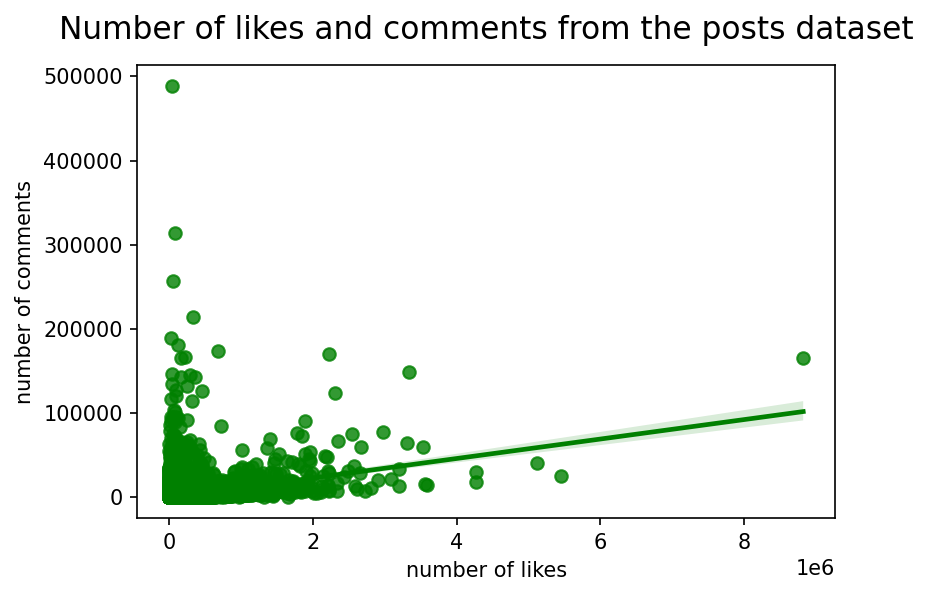

In [59]:
post = FindLC(df_names)
plotLC(post)

#### Analysis RQ8.1:
From the plot we can't find a clear connection between the two values. What we can clearly see is a tendency of the number of likes to be higher that the number of comments.

In [ ]:
# free up memory
del post

### RQ8.2 
Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [15]:
#Function that find all the number of likes for each post and at what time they were published 
#FindLikesCommentsTime
def FindLT(df_names):
    posts = []
    
    # Read in chunks only the col from the post df that I need 
    for chunk in pd.read_csv(df_names[0], delimiter='\t', usecols = ['numbr_likes', 'number_comments', 'cts'], 
                             on_bad_lines='skip', chunksize=500000):
        
        # clean the df
        chunk = clean_df(chunk, ['numbr_likes', 'number_comments', 'cts'])
        posts.append(chunk[['numbr_likes', 'number_comments', 'cts']])
        
    # Put everything together
    posts = pd.concat(posts)
    return posts 


# Function that using the time intervals from the RQ3 devide the posts in time of publishment 
# and count the number of likes and comments in each time frame
def TimeAllPost(Post):
    Time_intervals = [(6,11),(11,14),(14,17),(17,20),(20,24),(0,3),(3,6)]
    
    # Inizializing the Post_time array
    Post_time = np.zeros(shape = (len(Time_intervals), 2))
    Post.cts = pd.to_datetime(Post.cts)
    
    for j in range(len(Time_intervals)):
        # Find to which Time interval each post was published
        a = Post[(Post.cts.dt.hour >= Time_intervals[j][0])]
        b = Post[(Post.cts.dt.hour < Time_intervals[j][1])]
        
        # Sum together all the numeber of posts that were published in the j Time interval
        Post_time[j][0] += pd.merge(a,b, how='inner').numbr_likes.sum()
        Post_time[j][1] += pd.merge(a,b, how='inner').number_comments.sum()
        
    return Post_time


# Function that plot in the same bar plot the number of comments and like in each time frame
# plotLikesCommentsTime
def plotLCT (Times):
    barx =  ['[6,11)','[11,14)','[14,17)','[17,20)','[20,24)','[0,3)','[3,6)']
    X_axis = np.arange(len(barx))
    
    # bar plot of both number of comments and number of likes
    plt.subplot(3,1,1)
    plt.bar(X_axis - 0.2, Times[:,0], 0.4, label = 'Likes', color = 'purple')
    plt.bar(X_axis + 0.2, Times[:,1], 0.4, label = 'Comments', color = 'orange')
    plt.xticks(X_axis, barx)
    plt.xlabel("Time frames")
    plt.title("Likes and comments", fontsize=15, y=1.03)
    plt.legend()
    plt.show()
    
    # bar plot of just the number of likes
    plt.subplot(3,1,2)
    plt.bar(X_axis, Times[:,0], label = 'Likes', color = 'purple')
    plt.xticks(X_axis, barx)
    plt.xlabel("Time frames")
    plt.title("Likes", fontsize=15, y=1.03)
    plt.legend()
    plt.show()
    
    # bar plot of just the number of comments
    plt.subplot(3,1,3)
    plt.bar(X_axis, Times[:,1], label = 'Comments', color = 'orange')
    plt.xticks(X_axis, barx)
    plt.xlabel("Time frames")
    plt.title("Comments", fontsize=15, y=1.03)
    plt.legend()
    plt.show()

In [21]:
post = FindLT(df_names)
Times = TimeAllPost(post)

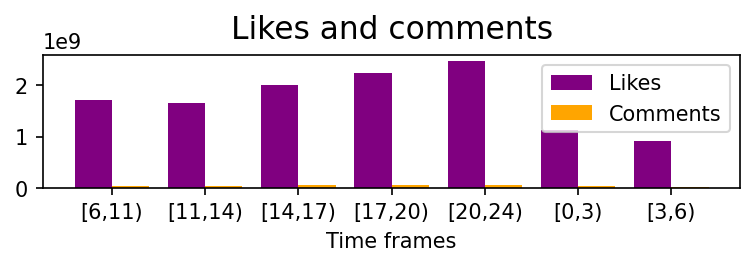

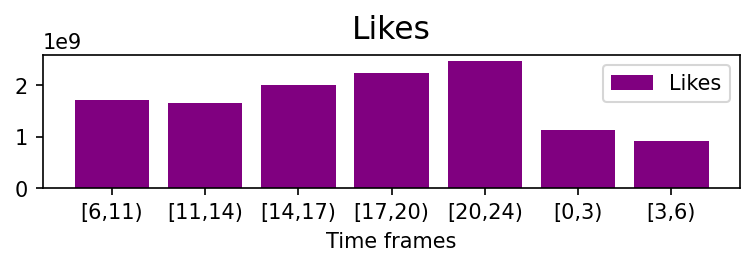

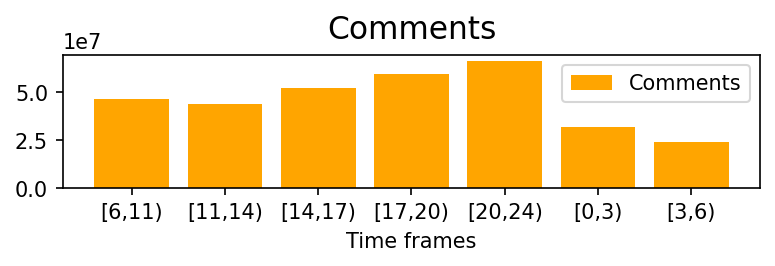

In [34]:
plotLCT(Times)

#### Analysis RQ8.2:
As noticed in the RQ8.1 the number of likes is, more or less, 100 times higher then the number of comments. From the bar plots can be clearly noticed that: 
1. The trend is the same for both the number of comments and the number of likes.
2. The posts published during the $[20,24)$ time frame are the ones that receive more attention when it comes to numbers. That can probably suggest that that's the time frame where we can find the higher number of active users.

### RQ8.3
What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [26]:
# Function that find the number of followers for each profile and compute the mean, mode, and quantiles
def FollowersPlots(df_names):
    follow = pd.read_csv(df_names[1], delimiter='\t', usecols = ['followers'], on_bad_lines='skip')
    follow = clean_df(follow, 'followers')
    return follow

# plot distribution of followers
def followersDist(Followers):
    plt.subplot(3,1,1)
    Followers.followers.plot(kind = 'kde', c = 'black') 
    plt.title("distribution, kde pandas function", fontsize=15, y=1.03)
    plt.show()
    plt.subplot(3,1,2)
    plt.hist(Followers.followers, color = 'red', bins = 200, density=True )  
    plt.title("distribution, histogram", fontsize=15, y=1.03)
    plt.show()
    plt.subplot(3,1,2)
    plt.hist(Followers.followers, color = 'red', bins = 200, density=True) 
    plt.ylim((0,10**(-12)))
    plt.title("Zoom near zero, histogram", fontsize=15, y=1.03)
    plt.show()

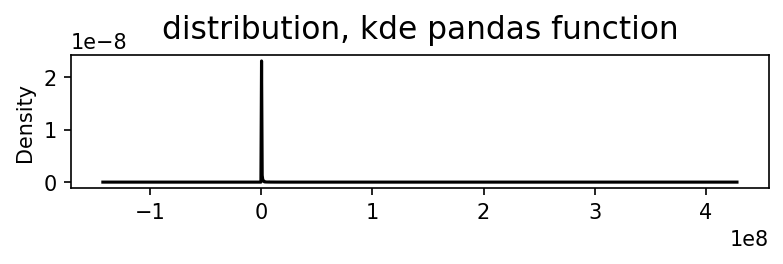

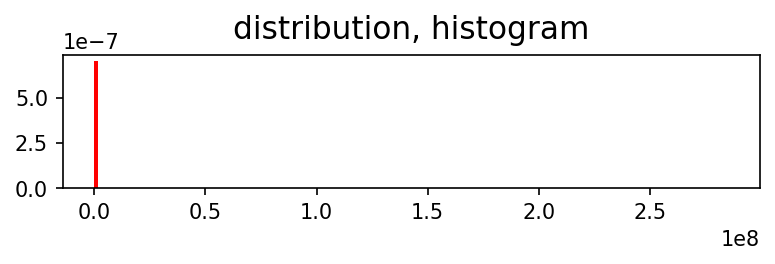

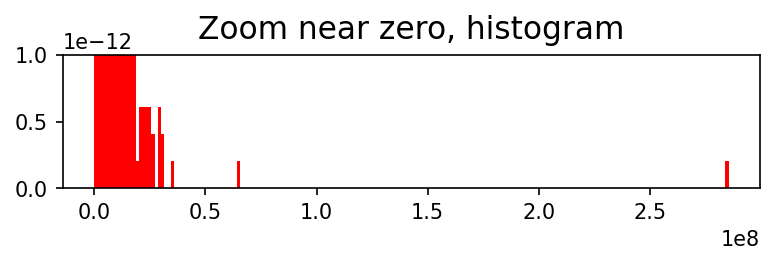

In [27]:
Followers = FollowersPlots(df_names)
followersDist(Followers)

In [109]:
# Function that campute mean, mode and quantiles of the number of followers
def FollowersInfo(Followers):
    print("Other than the distribution some other usefull informations of are it'summaries like:\n-The mean:", 
          Followers.followers.mean(),"\n-The mode:", str(float(Followers.followers.mode())))
    print('We can also be interested in the quantiles, a couple can be visualized with the box plot:\n')
    
    plt.subplot(2,1,1)
    plt.boxplot(Followers.followers, vert=False)  
    plt.title("boxplot of the followers", fontsize=15, y=1.03)
    plt.show()
    
    plt.subplot(2,1,2)
    plt.boxplot(Followers.followers,vert=False)  
    plt.xlim((0,1500))
    plt.title("Zoom of the boxplot", fontsize=15, y=1.03)
    plt.show()
    
    print('\nFrom what we can get from the box plot is the first quartile:', float(Followers.quantile(.25)), 
          'and the third:', str(float(Followers.quantile(.75))) + '. \nBut we can also plot the quantiles:\n')
    
    
    plt.subplot(2,1,1)
    Followers.followers.quantile(np.linspace(0, 1, 100)).plot(color = 'orange')
    plt.title("Quantiles", fontsize=15, y=1.03)
    plt.show()
    
    plt.subplot(2,1,2)
    Followers.followers.quantile(np.linspace(0, 1, 100)).plot(color = 'orange')  
    plt.xlim((0,0.9))
    plt.ylim((0,3000))
    plt.title("Zoom of the quantiles", fontsize=15, y=1.03)
    plt.show()

Other than the distribution some other usefull informations of are it'summaries like:
-The mean: 4739.899180397426 
-The mode: 0.0
We can also be interested in the quantiles, a couple can be visualized with the box plot:



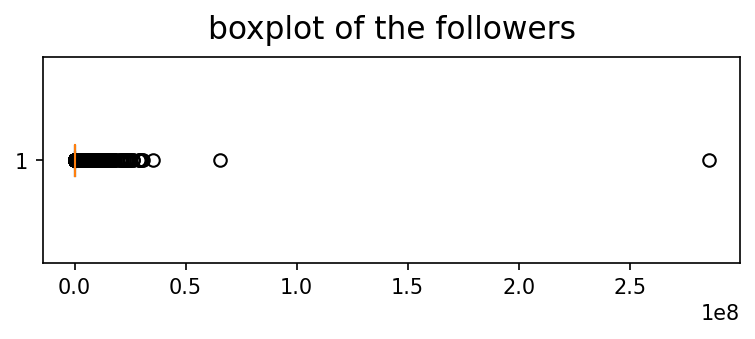

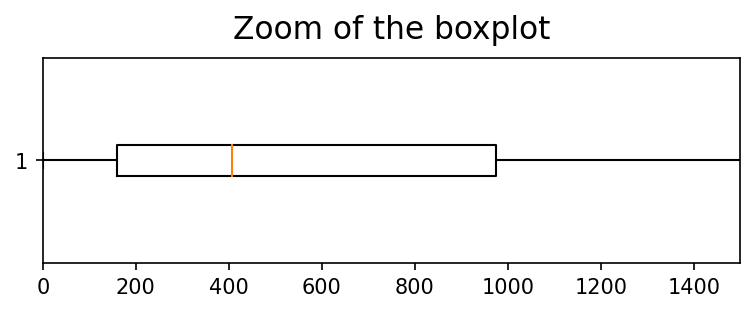


From what we can get from the box plot is the first quartile: 159.0 and the third: 974.0. 
But we can also plot the quantiles:



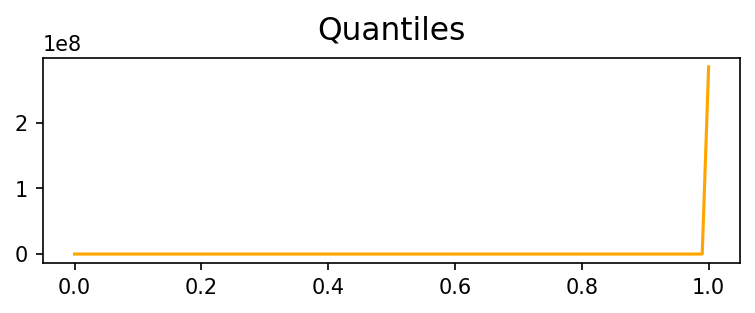

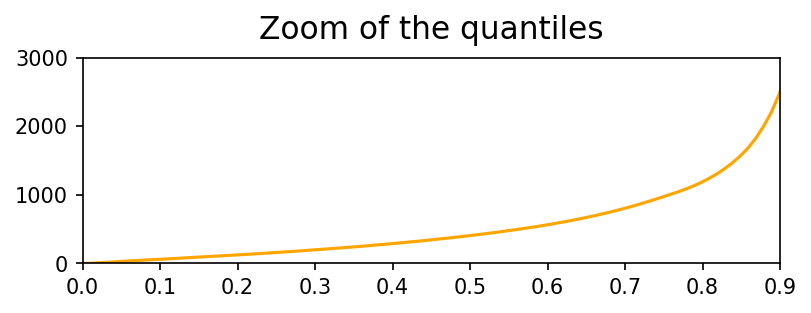

In [110]:
FollowersInfo(Followers)

#### RQ8.4
What are histograms, bar plots, scatterplots and pie charts used for?

Every kind of plot has it's best use:


| Plot | Use | Used in |
| --- | :-: | :-: | 
| Histograms | Display a variable distribution | RQ8.3 |
| Bar plot | Compare Data divided in subgroups | RQ8.2 |
| Scatterplot | Search and Find relationship between variables | RQ8.1 |
| Pie charts | Display and Find how Data is devided as a percentage of a whole | RQ2.4 RQ5.4 |

#### RQ8.5
What insights can you extract from a Box Plot?

When working with a set of data it may worth to plot a box plot, the reason for that is that it gives multiple informations about the population. In particolar, it shows 5 different summaries:
1. The minimum, the lower element of the set.
2. The first quartile, given a sorted set, it's the value that leave to it's left 25% of the population. 
3. The median, also known as second quartile, the value that leave to it's left 50% of the population.
4. The third quartile, the value that leave to it's left 75% of the population.
5. The maximum, the higher element of the set.

# Command Line Question

Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them.

profiles=`cat instagram_posts.csv | awk '{ if (length($8) > 100) {print $4} }' | uniq -c | head -n 10`
for i in `echo $profiles`; do echo $i; solution=`cat instagram_profiles.csv | awk -v var=$i '{ if ($2 == var) { print $3 }}'`; echo $solution; done

# AQ1

Given the following pseudocode, answer the questions:

In [ ]:
#do not run this
Input:
    N : an integer
    List : array of characters of length N without repetition
        
function f1(sequence, end):
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end):
    If start = end:
        f1(sequence, end)
    Else
        For i=start To end:
        temp <-- sequence[start]
        sequence[start] <-- sequence[i]
        sequence[i] <-- temp
        f2(sequence, start+1, end)
        temp <-- sequence[start]
        sequence[start] <-- sequence[i]
        sequence[i] <-- temp
        
f2(List, 0, N)

#### AQ1.1:
What is the output of this algorithm? Describe the mechanism of the algorithm in
detail . We do not want to know only its final result. (Describe one example on your
own)


##### Explanation of the algorithm:

The goal of the algorithm is to print every permutation of the characters that are contained in the list given in input.

To obtain this the function $\textbf{f2}$ is called recursively, on the $list(start+1:end$), until it get to the point were the $start$ is equal to $end$. When this happen the function $\textbf{f2}$ calls the function $\textbf{f1}$ and the elements of the list get printed.

The key to this algorithm is the function $\textbf{f2}$. In general during the $i^{th}$ call of $\textbf{f2}$ what happen is:
- If $start$, that is equal to $i$, is also equal to $end$ $\textbf{f1}$ is called.
- The $i^{th}$ element of the list get swapped iteratively with the element $j$, with $ j \in{\{i, i+1,...,end\}} $. 
- The $(i+1)^{th}$ iteration of $\textbf{f2}$ gets called on $(list, start + 1, end)$.
- The $i^{th}$ element of the list get swapped back and the new iteration start.

##### Example:

Let's make and example to explain it more clearly. 

We get a list: $List = [t,r,e]$, that has length 3 and we call the function $\textbf{f2}$:

In [ ]:
# Do not run this
f2([t,r,e], 1, 3):
    if: the check is false
    - i = 1
    swap -> [t,r,e]
    f2([t,r,e], 2, 3):
        if: the check is false
        - i = 2
        swap -> [t,r,e]
        f2([t,r,e], 3, 3):
            if: the check is true
                f1([t,r,e], 3):
                            output:
                                t
                                r
                                e
        swap back -> [t,r,e]
        
        - i = 3
        swap -> [t,e,r]
        f2([t,e,r], 3, 3):
            if: the check is true
                f1([t,e,r], 3):
                            output:
                                t
                                e
                                r
        swap back -> [t,r,e]
    swap back -> [t,r,e]
    
    - i = 2
    swap -> [r,t,e]
    f2([r,t,e], 2, 3):
        if: the check is false
        - i = 2
        swap -> [r,t,e]
        f2([r,t,e], 3, 3):
            if: the check is true
                f1([r,t,e], 3):
                            output:
                                r
                                t
                                e
        swap back -> [r,t,e]
        
        - i = 3
        swap -> [r,e,t]
        f2([r,e,t], 3, 3):
            if: the check is true
                f1([r,e,t], 3):
                            output:
                                r
                                e
                                t
        swap back -> [r,t,e]
    swap back -> [t,r,e]
    
    - i = 3
    swap -> [e,r,t]
    f2([e,r,t], 2, 3):
        if: the check is false
        - i = 2
        swap -> [e,r,t]
        f2([e,r,t], 3, 3):
            if: the check is true
                f1([r,t,e], 3):
                            output:
                                e
                                r
                                t
        swap back -> [e,r,t]
        
        - i = 3
        swap -> [e,t,r]
        f2([e,t,r], 3, 3):
            if: the check is true
                f1([e,t,r], 3):
                            output:
                                e
                                t
                                r
        swap back -> [e,r,t]
    swap back -> [t,r,e] 

#### AQ1.2
What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's
running time as a function of N?

##### Complexity of $\textbf{f1}$
As for $\textbf{f1}$, we enter the function only when $start$ reaches $end$ and what it does is print iteratively all the elements of my list.  
 So if we think of it's complexity, and the list is of length N, we have to compute N times the print operation on a single element and that has a constant time. 

$T(\textbf{f1})=N\cdot \mathcal{O}(1) = \mathcal{O}(N)$

The function $\textbf{f1}$ has a linear complexity.

##### Complexity of $\textbf{f2}$
$\textbf{f2}$ is main function of the algorithm and we can define it's complexity recursively usind the length of the list $N$.

For each call of the function $\textbf{f2}$, if $start \neq end$, the algorithm is going to call $N$ times itself on the $list = list[1:N]$ that has length $N-1$ and and compute some linear operations like swapping the elements.

$$ T(N)= N\cdot T(N-1) + \mathcal{O}(1)=N\cdot \left[(N-1)\cdot T(N-2) + \mathcal{O}(1)\right] + \mathcal{O}(1)=...= N!\cdot T(0) + \mathcal{O}(1)\cdot \sum_{i=0}^{N}\frac{N!}{N-i!}$$

Now we got to the point In which $N=0$, that means that $start = end$ and $\textbf{f1}$ gets called, $T(0)=T(\textbf{f1})$.

$$T(N) = N!\cdot T(0) + \mathcal{O}(1)\cdot \sum_{i=0}^{N}\frac{N!}{N-i!} = N!\cdot T(\textbf{f1}) + \mathcal{O}(1)\cdot \sum_{i=0}^{N}\frac{N!}{N-i!} = \mathcal{O}(N\cdot N!) + \mathcal{O}(1)\cdot \sum_{i=0}^{N}\frac{N!}{N-i!}$$.

Now it's easy to conclude that the dominant factor is $T(N)= \mathcal{O}(N\cdot N!)$ by noticing that $\frac{N!}{N-i!}<N!$  and, as a consequence, $\sum_{i=0}^{N}\frac{N!}{N-i!} < N\cdot N!$.

#### AQ1.3
Is this algorithm the optimal one to produce this output? If not, can you suggest a
better algorithm to perform the same task?

Yes the algorithm is optimal. That's because, given a list of length N, we have to find all of it's permutations and print them.
 Just the print, since the number of permutation is $N!$ and the print of each of their elements (as we saw with $\textbf{f1}$) has a complexity of $\mathcal{O}(N)$, has a complexity of $\Omega(N\cdot N!)$. 
 
That means that every algorithm that compute and print all of the permutations has to be an $\Omega(N\cdot N!)$ and since we saw already that our is a $\mathcal{O}(N\cdot N!)$, what we get is: $T(N)=\Theta(N\cdot N!)$ 

# AQ2: Ribbon Maximum Product

# 1
If the length of the ribbon is 0 or 1 and we must make a cut, then $res=0$.

Otherwise, we can cut the ribbon at different integer lengths and then we check which quantity is bigger:

- The first part before the cut times the remaining part, or
- We repeat this procedure with the remaining part of the ribbon and then multiply byy the very first part.

In [1]:
def maxProd(n):
    if n==0 or n==1:
        return(0)
    res=0 #Initialize the result
    for i in range(1,n-1): #Because cutting at the beginning or at the very end makes no sense
        res=max(res,i*(n-i),i*maxProd(n-i))
    return(res)

In [4]:
#Let's try it out:
for i in range(0,21,5):
    print(f'The maximum product with a ribbon of length {i} is {maxProd(i)}')

The maximum product with a ribbon of length 0 is 0
The maximum product with a ribbon of length 5 is 6
The maximum product with a ribbon of length 10 is 36
The maximum product with a ribbon of length 15 is 243
The maximum product with a ribbon of length 20 is 1458


But we can see that is we try it for higher values, it takes some time. How much in terms of $n$?

# 2

Observe that,

$$T(n)=c+ \sum_{i=1}^{n-1}T(i)$$

from that we can deduce that

$$T(n)=2c+2\sum_{i=1}^{n-2}T(n)=\dots=2^kc+2^kT(n-k)$$

and when $k=n-1$ we obtain that

$$T(n)=2^{n-1}c+2^{n-1}c=2^nc \Rightarrow T(n)=\Theta(2^n)$$

It is an exponential time algorithm.

# 3

We used a recursive method and we are going to use its structure, the maximum inside the loop in dynammic programming in order not to compute the same value several times. To do so, we will create a vector where we will save the previous results.

In [16]:
def maxProdDP(n):
    res=[0 for _ in range(n+1)] #We make a list/vector to save the values from 0 to the n-th, the one we want.
    
    for i in range(1,n+1):
        aux=0  
        for j in range(1,i):  
            aux=max(aux,(i-j)*j,j*res[i-j]) #We call the vector with the previous values instead of the function    
        res[i]=aux
        
    return(res[n])

In [17]:
#Let's try it out:
for i in range(0,41,5):
    print(f'The maximum product with a ribbon of length {i} is {maxProdDP(i)}')

The maximum product with a ribbon of length 0 is 0
The maximum product with a ribbon of length 5 is 6
The maximum product with a ribbon of length 10 is 36
The maximum product with a ribbon of length 15 is 243
The maximum product with a ribbon of length 20 is 1458
The maximum product with a ribbon of length 25 is 8748
The maximum product with a ribbon of length 30 is 59049
The maximum product with a ribbon of length 35 is 354294
The maximum product with a ribbon of length 40 is 2125764


Here we can clearly observe that

$$T(n)=\sum_{i=1}^{n}i=\frac{n(n+1)}{2}\Rightarrow T(n)=\Theta(n^2)$$

# 4

We are going to evaluate the running time of the algorithm for different values of $n\in[2,25]$ and plot it

Text(0, 0.5, 'Time of execution / T(n) (s)')

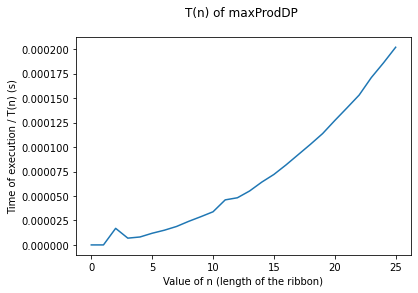

In [51]:
import time
t=[0 for _ in range(26)]

for i in range(2,26):
    b=time.time()
    maxProdDP(i)
    t[i]=time.time()-b

import matplotlib.pyplot as plt

plt.plot(t)
plt.title('T(n) of maxProdDP \n')
plt.xlabel('Value of n (length of the ribbon)')
plt.ylabel('Time of execution / T(n) (s)')

